# A very simple MNIST classifier.
- From the documentation at http://tensorflow.org/tutorials/mnist/beginners/index.md


In [90]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse
import sys

from tensorflow.examples.tutorials.mnist import input_data

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [91]:
def main():
    # Import data
    mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)
    
    # Parameters
    learning_rate = 0.5
    num_iters = 1000
    batch_size = 100
    
    # Create the model
    x = tf.placeholder(tf.float32, [None, 784])
    W = tf.Variable(tf.zeros([784, 10]))
    b = tf.Variable(tf.zeros([10]))
    y = tf.matmul(x, W) + b

    # Define loss and optimizer
    y_ = tf.placeholder(tf.float32, [None, 10])

    # The raw formulation of cross-entropy,
    #
    #   tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(tf.nn.softmax(y)),
    #                                 reduction_indices=[1]))
    #
    # can be numerically unstable.
    #
    # So here we use tf.nn.softmax_cross_entropy_with_logits on the raw
    # outputs of 'y', and then average across the batch.
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
    train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

    # Initialize the variables (i.e. assign their default value)
    init = tf.global_variables_initializer()

    # Start training
    with tf.Session() as sess:
        # Run the initializer
        sess.run(init)  

        # Train
        for _ in range(num_iters):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

        # Test trained model
        correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        print(sess.run(accuracy, feed_dict={x: mnist.test.images,
                                            y_: mnist.test.labels}))

main()

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
0.9161


### (a) For each of the output classes, identify 10 misclassified test samples and visualize them in your report. And why do you think they got misclassified

In [92]:


# Import data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

# Parameters
learning_rate = 0.001
num_steps = 1000
batch_size = 300
display_step = 100

# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 
num_input = 784  # MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)

# tf Graph input
X = tf.placeholder("float", [None, num_input])
Y = tf.placeholder("float", [None, num_classes])

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, num_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}

# Create model
def neural_net(x):
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

# Construct model
logits = neural_net(X)
# print(logits)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Evaluate model (with test logits, for dropout to be disabled)
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Checking odd even and calculating the accuracy
odd_correct_pred = tf.equal(((tf.argmax(logits, 1))%2), ((tf.argmax(Y, 1))%2))
odd_accuracy = tf.reduce_mean(tf.cast(odd_correct_pred, tf.float32))

#Validation against the actual data
#odd_index_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
out_Yhat_index = tf.argmax(logits, 1)
out_Y_index = tf.argmax(Y, 1)

# y = tf.cond(condition > 0, lambda: tf.matmul(x, W) + b, lambda: tf.matmul(x, W) - b)
#out_misclass_index = tf.cond(odd_correct_pred == 0, tf.argmax(Y, 1) , -1)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [93]:
# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    for step in range(1, num_steps+1):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # Run optimization op (backprop)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        if step % display_step == 0 or step == 1:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
                                                                 Y: batch_y})
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))

            odd_loss, odd_acc = sess.run([loss_op, odd_accuracy], feed_dict={X: batch_x, Y: batch_y})
            print("Step " + str(step) + ", odd Minibatch Loss= " + \
                  "{:.4f}".format(odd_loss) + ", odd Training Accuracy= " + \
                  "{:.3f}".format(odd_acc))
            
    print("Optimization Finished!")

    # Calculate accuracy for MNIST test images
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={X: mnist.test.images,
                                      Y: mnist.test.labels}))
    print("Odd Testing Accuracy:", \
        sess.run(odd_accuracy, feed_dict={X: mnist.test.images,
                                      Y: mnist.test.labels}))
    
    
    out_Yhat, out_Y = sess.run([out_Yhat_index, out_Y_index], feed_dict={X: mnist.test.images, 
                                                      Y: mnist.test.labels})
    print("Vals Testing Accuracy:", out_Yhat)
    

Step 1, Minibatch Loss= 3782.0105, Training Accuracy= 0.070
Step 1, odd Minibatch Loss= 3782.0105, odd Training Accuracy= 0.453
Step 100, Minibatch Loss= 259.7546, Training Accuracy= 0.777
Step 100, odd Minibatch Loss= 259.7546, odd Training Accuracy= 0.870
Step 200, Minibatch Loss= 172.3061, Training Accuracy= 0.810
Step 200, odd Minibatch Loss= 172.3061, odd Training Accuracy= 0.897
Step 300, Minibatch Loss= 158.0566, Training Accuracy= 0.810
Step 300, odd Minibatch Loss= 158.0566, odd Training Accuracy= 0.910
Step 400, Minibatch Loss= 120.9039, Training Accuracy= 0.853
Step 400, odd Minibatch Loss= 120.9039, odd Training Accuracy= 0.913
Step 500, Minibatch Loss= 98.3266, Training Accuracy= 0.880
Step 500, odd Minibatch Loss= 98.3266, odd Training Accuracy= 0.943
Step 600, Minibatch Loss= 83.9284, Training Accuracy= 0.843
Step 600, odd Minibatch Loss= 83.9284, odd Training Accuracy= 0.907
Step 700, Minibatch Loss= 106.6466, Training Accuracy= 0.837
Step 700, odd Minibatch Loss= 106.6

(10000, 784) (10000, 10)
Computed: [7 2 1 0 4 1 4 9 6 9]
Label   : [7 2 1 0 4 1 4 9 5 9]
Misclassifications:[Class 0]  [126, 380, 586, 717, 723, 1191, 1246, 1404, 1570, 1712, 1748]


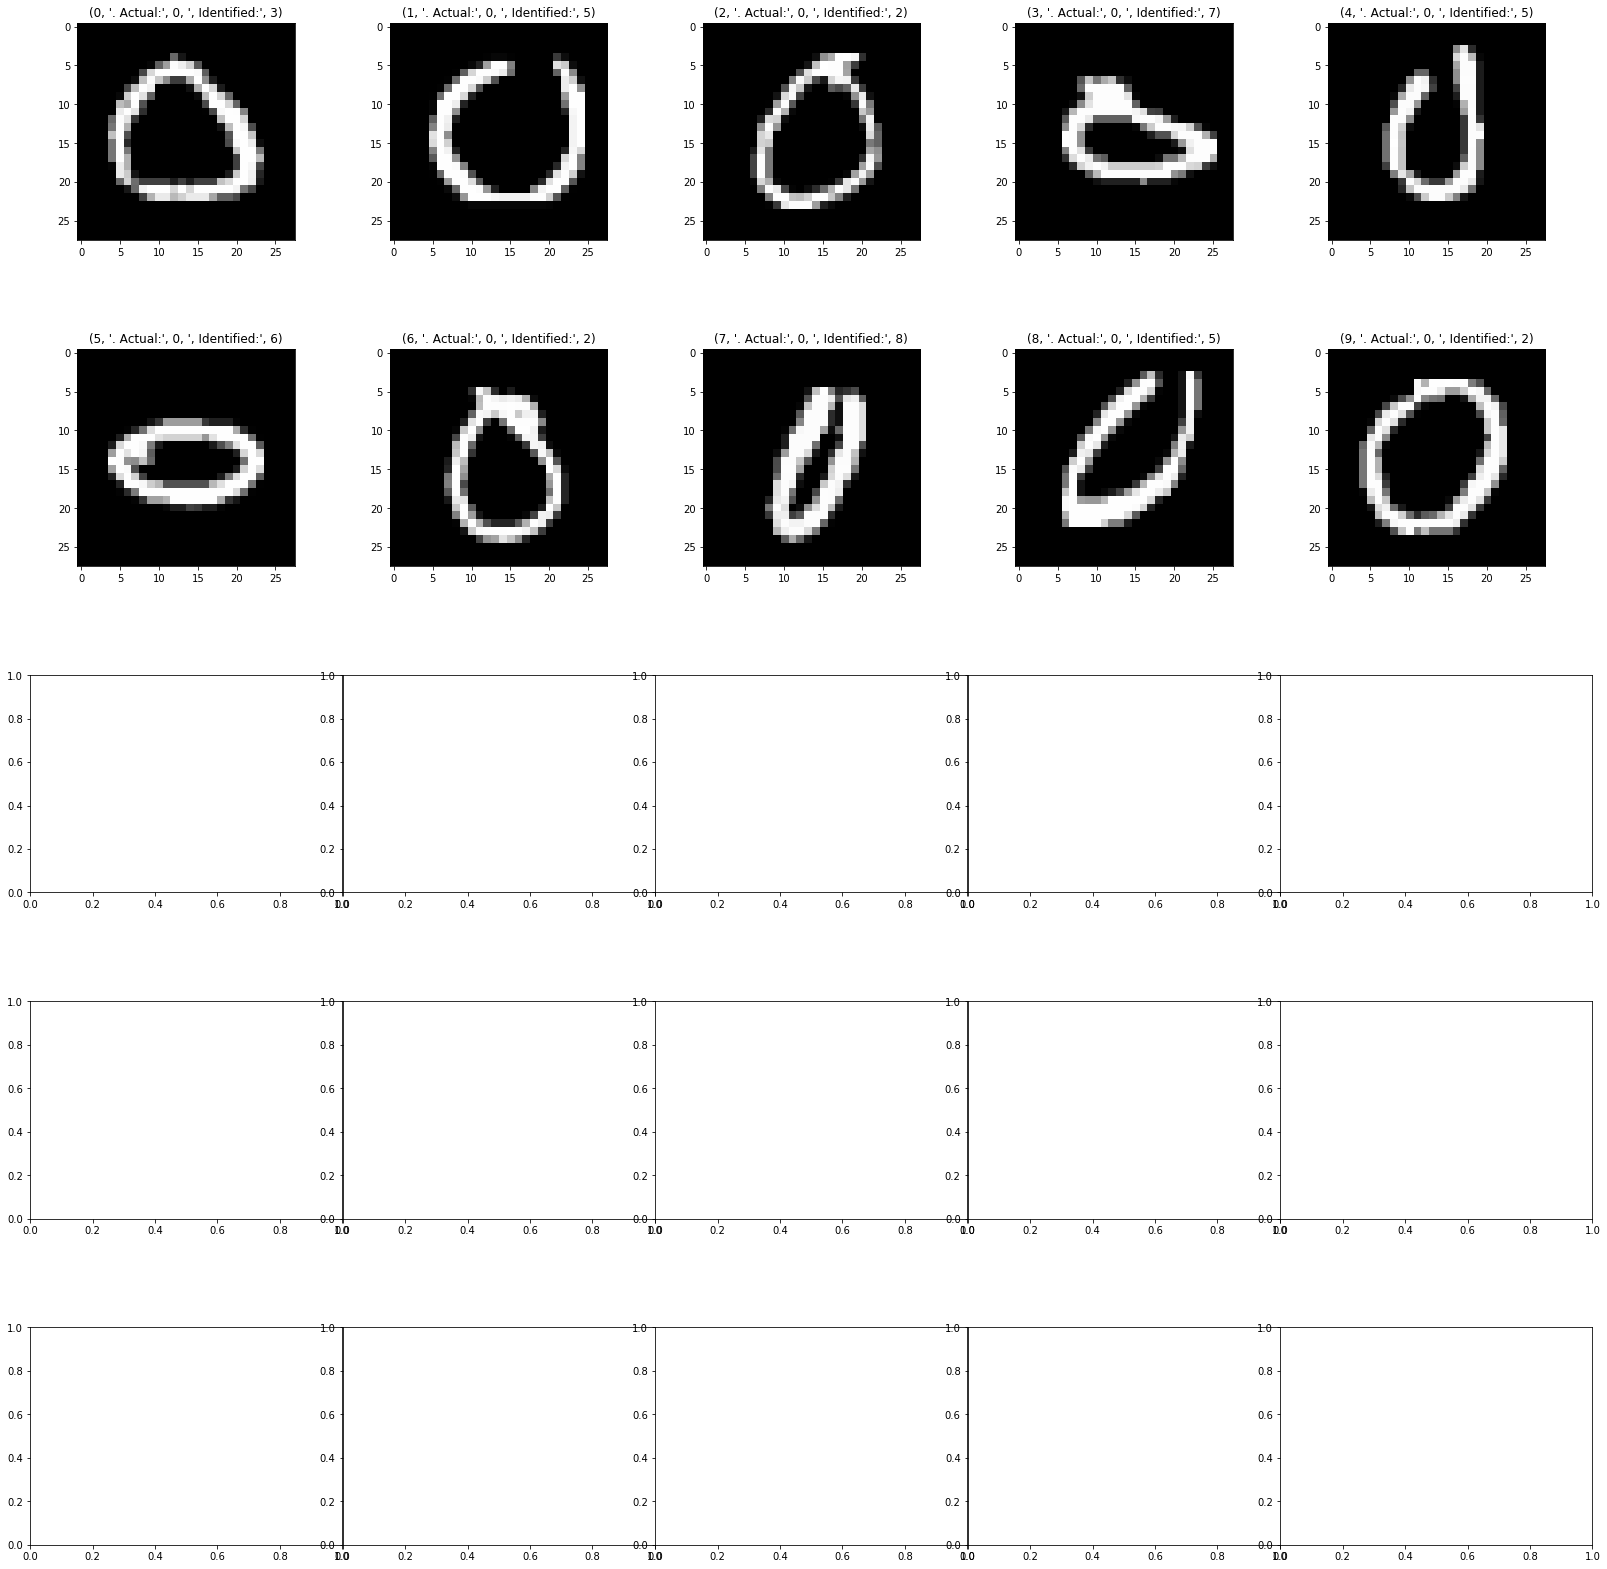

In [109]:


print(mnist.test.images.shape, mnist.test.labels.shape)
print('Computed:', out_Yhat[0:10])
print('Label   :',out_Y[0:10])

miscl0 = []
for i in range(0,5000):
    # For label 0
    if(out_Y[i] != out_Yhat[i]):
        if(out_Y[i] == 0 and len(miscl0) <= 10):
            #print('Misclassified: ', out_Y[i])
            miscl0.append(i)

def plotSub5by5(misclass):
    fig, axs = plt.subplots(5,5, figsize=(28, 28))
    fig.subplots_adjust(hspace = .5, wspace=.001)
    axs = axs.ravel()
    for i in range(10):
        idx = misclass[i]
        axs[i].imshow(np.reshape(mnist.test.images[idx], [28, 28]), cmap='gray')
        title = i,'. Actual:',out_Y[idx],', Identified:',out_Yhat[idx]
        axs[i].set_title(title)

print('Misclassifications Id:[Class 0] ',miscl0)
plotSub5by5(miscl0)

    




### (b) Instead of modifying the model add a new layer at the end of the network from tutorial. Explain the code changes required and report the results.

In [111]:

# Import data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

# Parameters
learning_rate = 0.001
num_steps = 1000
batch_size = 300
display_step = 100

# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256
n_hidden_3 = 256
num_input = 784  # MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)

# tf Graph input
X = tf.placeholder("float", [None, num_input])
Y = tf.placeholder("float", [None, num_classes])

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
    'out': tf.Variable(tf.random_normal([n_hidden_3, num_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'b3': tf.Variable(tf.random_normal([n_hidden_3])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}

# Create model
def neural_net(x):
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    #hidden layer 3
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

# Construct model
logits = neural_net(X)
# print(logits)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Evaluate model (with test logits, for dropout to be disabled)
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Checking odd even and calculating the accuracy
odd_correct_pred = tf.equal(((tf.argmax(logits, 1))%2), ((tf.argmax(Y, 1))%2))
odd_accuracy = tf.reduce_mean(tf.cast(odd_correct_pred, tf.float32))

#Validation against the actual data
#odd_index_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
out_Yhat_index = tf.argmax(logits, 1)
out_Y_index = tf.argmax(Y, 1)

# y = tf.cond(condition > 0, lambda: tf.matmul(x, W) + b, lambda: tf.matmul(x, W) - b)
#out_misclass_index = tf.cond(odd_correct_pred == 0, tf.argmax(Y, 1) , -1)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [112]:
# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    for step in range(1, num_steps+1):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # Run optimization op (backprop)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        if step % display_step == 0 or step == 1:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
                                                                 Y: batch_y})
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))

            odd_loss, odd_acc = sess.run([loss_op, odd_accuracy], feed_dict={X: batch_x, Y: batch_y})
            print("Step " + str(step) + ", odd Minibatch Loss= " + \
                  "{:.4f}".format(odd_loss) + ", odd Training Accuracy= " + \
                  "{:.3f}".format(odd_acc))
            
    print("Optimization Finished!")

    # Calculate accuracy for MNIST test images
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={X: mnist.test.images,
                                      Y: mnist.test.labels}))
    print("Odd Testing Accuracy:", \
        sess.run(odd_accuracy, feed_dict={X: mnist.test.images,
                                      Y: mnist.test.labels}))
    
    
    out_Yhat, out_Y = sess.run([out_Yhat_index, out_Y_index], feed_dict={X: mnist.test.images, 
                                                      Y: mnist.test.labels})
    print("Vals Testing Accuracy:", out_Yhat)
    

Step 1, Minibatch Loss= 3268.7207, Training Accuracy= 0.103
Step 1, odd Minibatch Loss= 3268.7207, odd Training Accuracy= 0.520
Step 100, Minibatch Loss= 232.9726, Training Accuracy= 0.733
Step 100, odd Minibatch Loss= 232.9726, odd Training Accuracy= 0.857
Step 200, Minibatch Loss= 178.8472, Training Accuracy= 0.820
Step 200, odd Minibatch Loss= 178.8472, odd Training Accuracy= 0.907
Step 300, Minibatch Loss= 119.7769, Training Accuracy= 0.860
Step 300, odd Minibatch Loss= 119.7769, odd Training Accuracy= 0.943
Step 400, Minibatch Loss= 125.9571, Training Accuracy= 0.827
Step 400, odd Minibatch Loss= 125.9571, odd Training Accuracy= 0.897
Step 500, Minibatch Loss= 124.9741, Training Accuracy= 0.827
Step 500, odd Minibatch Loss= 124.9741, odd Training Accuracy= 0.880
Step 600, Minibatch Loss= 89.8414, Training Accuracy= 0.837
Step 600, odd Minibatch Loss= 89.8414, odd Training Accuracy= 0.917
Step 700, Minibatch Loss= 76.1876, Training Accuracy= 0.870
Step 700, odd Minibatch Loss= 76.1

(10000, 784) (10000, 10)
Computed: [7 2 1 0 4 1 4 9 6 9]
Label   : [7 2 1 0 4 1 4 9 5 9]
Misclassifications Id:[Class 0]  [305, 324, 552, 567, 661, 717, 721, 1288, 2185, 2328, 2329]


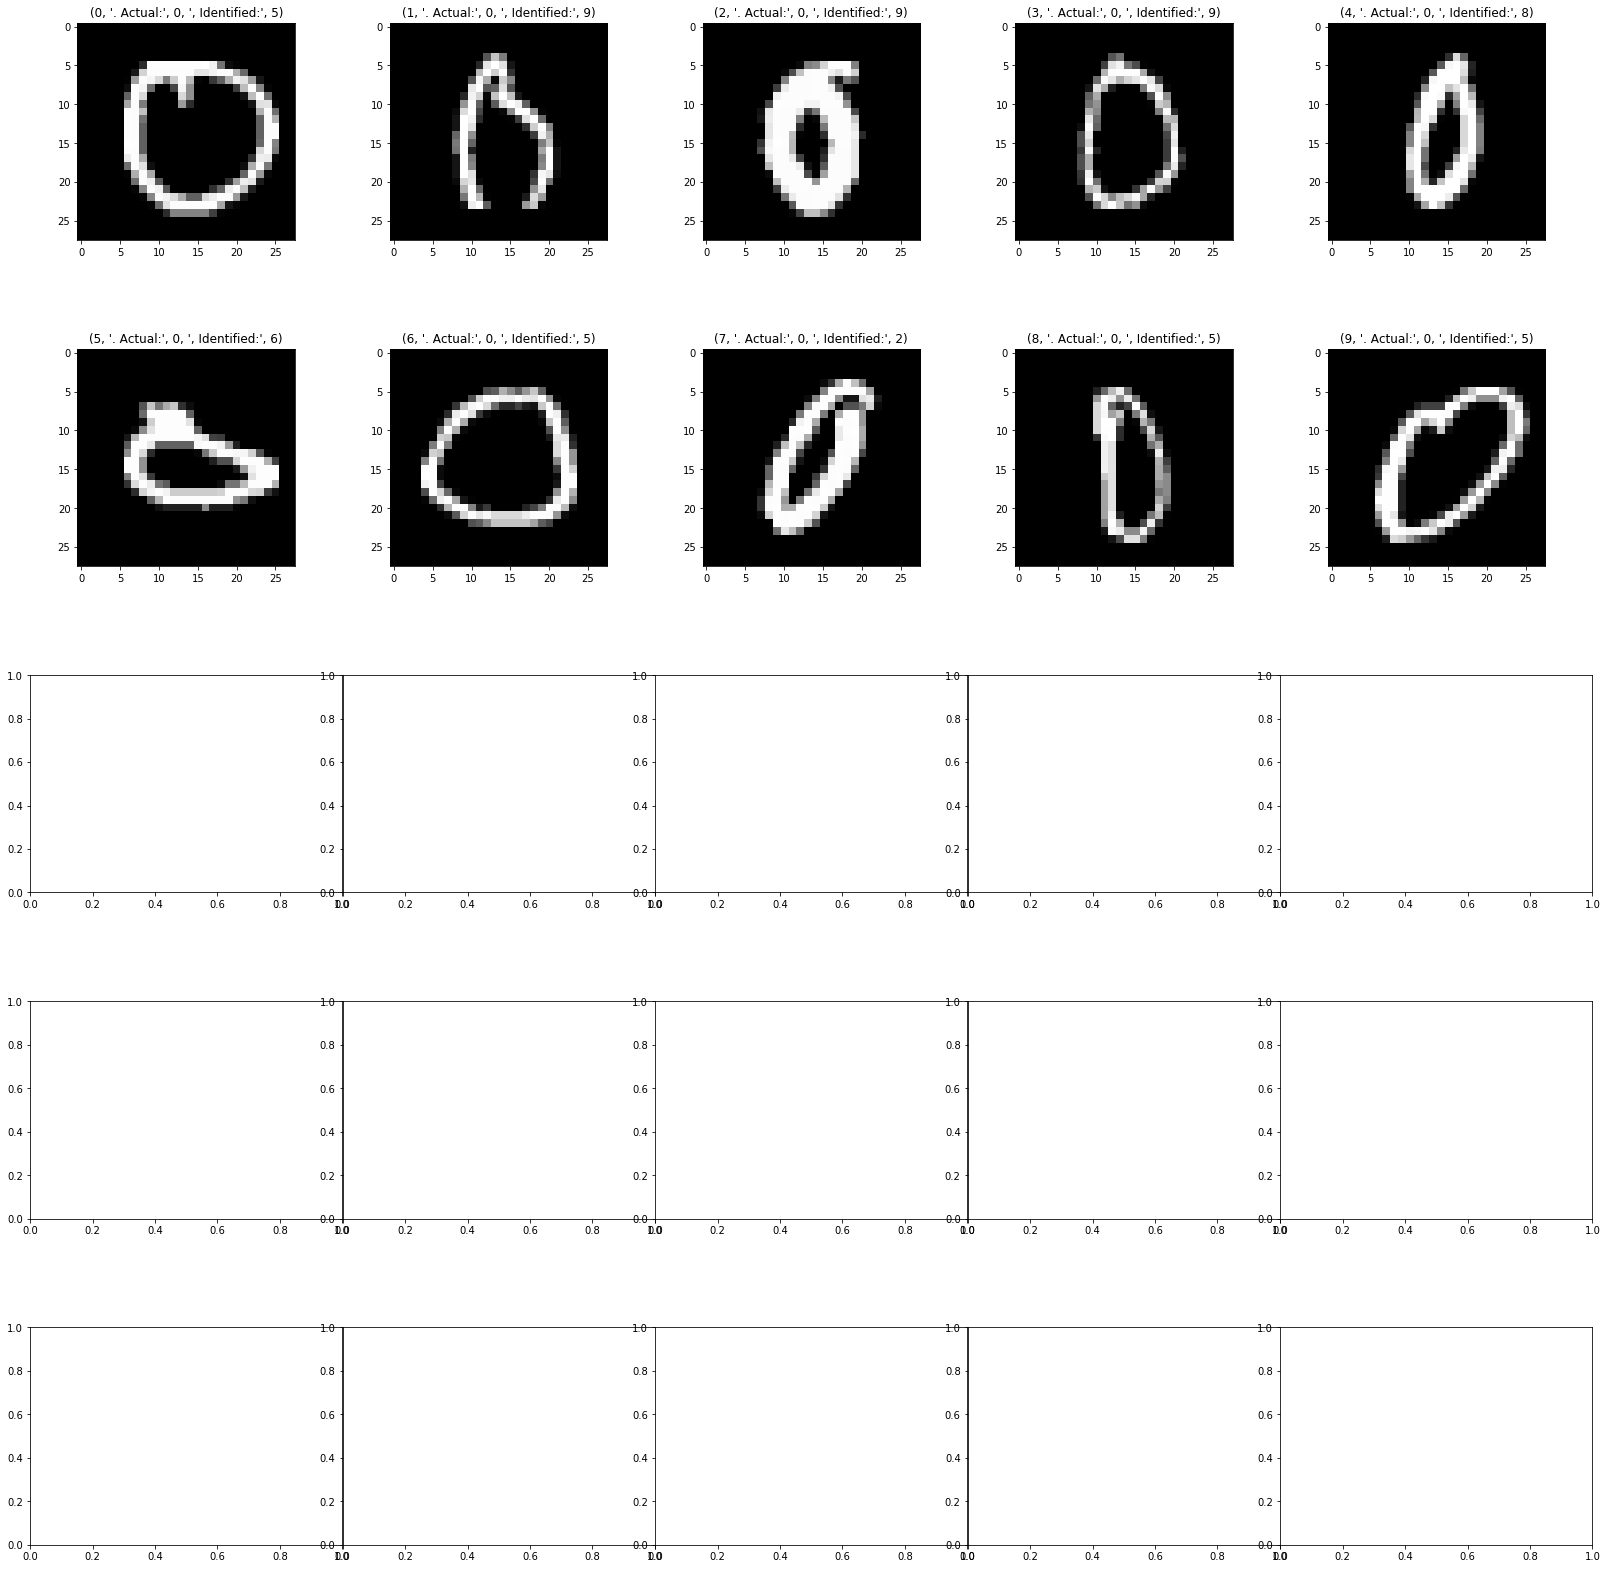

In [113]:
print(mnist.test.images.shape, mnist.test.labels.shape)
print('Computed:', out_Yhat[0:10])
print('Label   :',out_Y[0:10])

miscl0 = []
for i in range(0,5000):
    # For label 0
    if(out_Y[i] != out_Yhat[i]):
        if(out_Y[i] == 0 and len(miscl0) <= 10):
            #print('Misclassified: ', out_Y[i])
            miscl0.append(i)

def plotSub5by5(misclass):
    fig, axs = plt.subplots(5,5, figsize=(28, 28))
    fig.subplots_adjust(hspace = .5, wspace=.001)
    axs = axs.ravel()
    for i in range(10):
        idx = misclass[i]
        axs[i].imshow(np.reshape(mnist.test.images[idx], [28, 28]), cmap='gray')
        title = i,'. Actual:',out_Y[idx],', Identified:',out_Yhat[idx]
        axs[i].set_title(title)

print('Misclassifications Id:[Class 0] ',miscl0)
plotSub5by5(miscl0)


### (c) Explain the conceptual difference between the two methods i.e., modifying the last layer and adding a new layer